<a href="https://colab.research.google.com/github/sowmyarajesh/ML-NLP/blob/main/sentiment_ananlysis_nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.classify import ClassifierI
from nltk.classify.scikitlearn import SklearnClassifier

import random
import pickle
import re
import os

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from statistics import mode

Download the imdb dataset from kaggle


In [2]:
import pandas as pd 
dataset= pd.read_csv('IMDB_Dataset.csv')
dataset.shape, dataset.columns

((50000, 2), Index(['review', 'sentiment'], dtype='object'))

In [3]:
dataset['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Split the data into test train

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.20)
train, val = train_test_split(train, test_size=0.20)
train.shape, test.shape

((32000, 2), (10000, 2))

# Preprocessing:

First remove all the stopwords in the dataset and create bag-of-words lists

In [13]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [14]:
all_words = []
documents = []

from nltk.corpus import stopwords
import re

stop_words = list(set(stopwords.words('english')))

'''
 j = adjective
 r = adverb
 v = verb

'''
allowed_word_types = ['J']

for i,r in train.iterrows():
  documents.append((r['review'], r['sentiment']))
  # remove punctuation
  cleaned = re.sub(r'[^(a-zA-z)\s]','',r['review'])
  # tokenize 
  tokenized = word_tokenize(cleaned)
  # remove stopwords
  stopped = [w for w in tokenized if not w in stop_words]
  # parts of speech tagging
  tagged = nltk.pos_tag(stopped)
  # make a list of all adjectives allowed by the words types in the list
  for w in tagged:
    if w[1][0] in allowed_word_types:
      all_words.append(w[0].lower())


In [15]:
all_words = nltk.FreqDist(all_words)
all_words

FreqDist({'dont': 1655,
          'first': 5765,
          'outstanding': 468,
          'funniest': 379,
          'danish': 37,
          'funny': 3812,
          'surprising': 269,
          'entire': 1770,
          'incredible': 596,
          'best': 6244,
          'many': 8337,
          'standard': 290,
          'possible': 1188,
          'red': 422,
          'inevitable': 164,
          'showdown': 41,
          'clever': 229,
          'complex': 453,
          'terrible': 1858,
          'easy': 820,
          'disturbs': 2,
          'likebr': 16,
          'original': 3784,
          'couple': 623,
          'lusty': 11,
          'bitter': 130,
          'critic': 81,
          'good': 17289,
          'latecomer': 1,
          'understated': 67,
          'japanese': 690,
          'postwwii': 4,
          'universal': 79,
          'several': 1802,
          'landmark': 9,
          'late': 828,
          'idiosyncratic': 18,
          'intergenerational': 5,
      

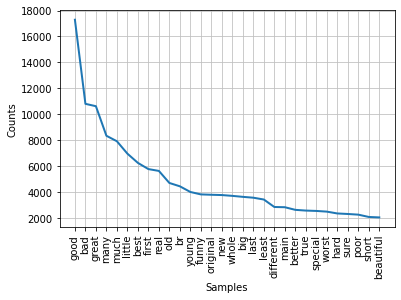

In [16]:
import matplotlib.pyplot as plt
all_words.plot(30, cumulative=False)

In [18]:
# get the top 1000 words
word_features = list(all_words.keys())[:1000]
word_features

['dont',
 'first',
 'outstanding',
 'funniest',
 'danish',
 'funny',
 'surprising',
 'entire',
 'incredible',
 'best',
 'many',
 'standard',
 'possible',
 'red',
 'inevitable',
 'showdown',
 'clever',
 'complex',
 'terrible',
 'easy',
 'disturbs',
 'likebr',
 'original',
 'couple',
 'lusty',
 'bitter',
 'critic',
 'good',
 'latecomer',
 'understated',
 'japanese',
 'postwwii',
 'universal',
 'several',
 'landmark',
 'late',
 'idiosyncratic',
 'intergenerational',
 'elliptical',
 'subtle',
 'keen',
 'centenary',
 'right',
 'requisite',
 'emotional',
 'glacial',
 'young',
 'midth',
 'pregnant',
 'likely',
 'lengthy',
 'frame',
 'abundance',
 'consistent',
 'dive',
 'maximal',
 'minimal',
 'particular',
 'noncommittal',
 'passive',
 'much',
 'whole',
 'atmosphere',
 'interminablebr',
 'unobtrusive',
 'memorable',
 'natural',
 'expert',
 'cardinal',
 'stable',
 'documentary',
 'obvious',
 'interesting',
 'unremarkable',
 'worth',
 'inspired',
 'classic',
 'hard',
 'mundane',
 'meet',
 'cer

Create a dictionary of features for each review in the list  document. 
the keys are the words in the word_features
the values of the keys is boolean representation if the word appears in the review or not


In [19]:
def find_feature(document):
  words = word_tokenize(document)
  features ={}
  for w in word_features:
    features[w] = w in words
  return features

featuresets = [(find_feature(review),sentiment) for (review, sentiment) in documents ]

#shuffle the document
random.shuffle(featuresets)

trainset = featuresets[:25000]
testset = featuresets[25000:]


In [20]:
featuresets[1]

({'dont': False,
  'first': True,
  'outstanding': False,
  'funniest': False,
  'danish': False,
  'funny': False,
  'surprising': False,
  'entire': False,
  'incredible': False,
  'best': False,
  'many': False,
  'standard': False,
  'possible': False,
  'red': False,
  'inevitable': False,
  'showdown': False,
  'clever': False,
  'complex': False,
  'terrible': False,
  'easy': False,
  'disturbs': False,
  'likebr': False,
  'original': False,
  'couple': False,
  'lusty': False,
  'bitter': False,
  'critic': False,
  'good': False,
  'latecomer': False,
  'understated': False,
  'japanese': False,
  'postwwii': False,
  'universal': False,
  'several': False,
  'landmark': False,
  'late': False,
  'idiosyncratic': False,
  'intergenerational': False,
  'elliptical': False,
  'subtle': False,
  'keen': False,
  'centenary': False,
  'right': False,
  'requisite': False,
  'emotional': False,
  'glacial': False,
  'young': False,
  'midth': False,
  'pregnant': False,
  'likely

# train and test

Try various classification model and compare the results

In [21]:
classifier = nltk.NaiveBayesClassifier.train(trainset)
print(nltk.classify.accuracy(classifier, testset))

0.8127142857142857


In [22]:
classifier.show_most_informative_features(15)

Most Informative Features
              incoherent = True           negati : positi =     12.0 : 1.0
               laughable = True           negati : positi =     12.0 : 1.0
           uninteresting = True           negati : positi =     10.7 : 1.0
                   worst = True           negati : positi =     10.2 : 1.0
                   awful = True           negati : positi =      8.6 : 1.0
              tenderness = True           positi : negati =      7.7 : 1.0
               enchanted = True           positi : negati =      6.8 : 1.0
               marvelous = True           positi : negati =      6.5 : 1.0
              invaluable = True           positi : negati =      6.4 : 1.0
                spacious = True           positi : negati =      6.4 : 1.0
             magnificent = True           positi : negati =      6.2 : 1.0
              delightful = True           positi : negati =      6.1 : 1.0
                pathetic = True           negati : positi =      6.1 : 1.0

In [24]:
mnb_clf = SklearnClassifier(MultinomialNB()).train(trainset)
print(nltk.classify.accuracy(mnb_clf,testset))


0.8107142857142857


In [25]:
clf = SklearnClassifier(BernoulliNB()).train(trainset)
print(nltk.classify.accuracy(clf,testset))

0.8127142857142857


In [26]:
clf = SklearnClassifier(LogisticRegression()).train(trainset)
print(nltk.classify.accuracy(clf,testset))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8164285714285714


In [27]:
clf = SklearnClassifier(SGDClassifier()).train(trainset)
print(nltk.classify.accuracy(clf,testset))

0.8081428571428572


In [ ]:
clf = SklearnClassifier(SVC()).train(trainset)
print(nltk.classify.accuracy(clf,testset))

In [ ]:
clf = SklearnClassifier(NuSVC()).train(trainset)
print(nltk.classify.accuracy(clf,testset))

In [ ]:
from sklearn import linear_model
clf = SklearnClassifier(LinearSVC()).train(trainset)
print(nltk.classify.accuracy(clf,testset))